In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import save_img

In [4]:
df = pd.read_csv('merged_data_final.csv')
print(df.head(5))

df["view"].fillna("AP",inplace=True) #All images with blank views are of AP view

   Unnamed: 0                  filename          label view
0           0  Radiography/NORMAL-1.PNG  non-infection   AP
1           1  Radiography/NORMAL-2.PNG  non-infection   AP
2           2  Radiography/NORMAL-3.PNG  non-infection   AP
3           3  Radiography/NORMAL-4.PNG  non-infection   AP
4           4  Radiography/NORMAL-5.PNG  non-infection   AP


In [5]:
datagen = ImageDataGenerator(
        rotation_range=15, # rotation
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        brightness_range=[0.2,1.2]) # brightness

In [6]:
train_generator = datagen.flow_from_directory(
                  directory='train2',
                  target_size=(224, 224), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020, # to make the result reproducible
                  subset='training'
                  )

Found 1981 images belonging to 3 classes.


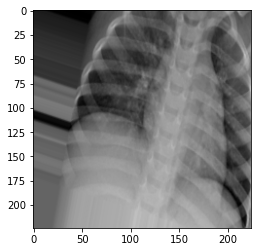

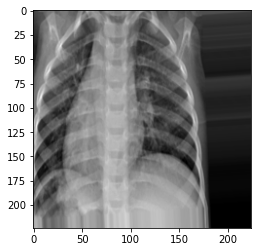

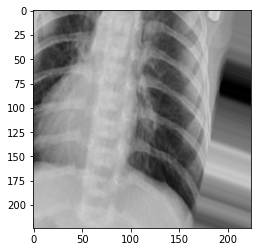

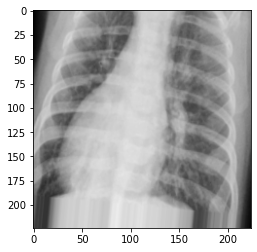

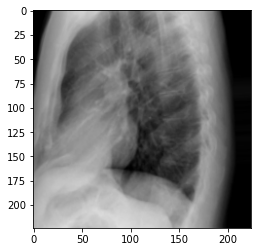

In [7]:
import numpy as np
import matplotlib.pyplot as plt

countaug = 0

for i in range(10000):
    countaug+=1
    # generate batch of images
    batchX, batchy = train_generator.next()
    image = batchX[0].astype('uint8')
    # Displaying 5 images for checking example
    if( countaug <= 5):
        plt.imshow(image)
        plt.show()
    
    if(batchy == 1):
        save_img('train1/covid_pneumonia/augmented_'+str(countaug)+'.png', image)
    elif(batchy == 2):
        save_img('train1/healthy/augmented_'+str(countaug)+'.png', image)
    elif(batchy == 3):
        save_img('train1/pneumonia/augmented_'+str(countaug)+'.png', image)   

In [9]:
from os import listdir
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
dst_train_directories = ["train1/covid_pneumonia", 
                         "train1/healthy", 
                         "train1/pneumonia"]
dst_test_directories = ["test2/covid_pneumonia",
                        "test2/healthy",
                        "test2/pneumonia"]
for i in listdir(dst_train_directories[0]):
      count0+=1
for i in listdir(dst_train_directories[1]):
      count2+=1
for i in listdir(dst_train_directories[2]):
      count4+=1
for i in listdir(dst_test_directories[0]):
      count1+=1
for i in listdir(dst_test_directories[1]):
      count3+=1
for i in listdir(dst_test_directories[2]):
      count5+=1
    
    
print("Covid-pnuemonia -> train: " +str(count0)+ " , test: " +str(count1))
print("Healthy -> train: " +str(count2)+ " , test: " +str(count3))
print("Non-covid pnuemonia -> train: " +str(count4)+ " , test: " +str(count5))
print("========================================")
print("Total train images : " + str(count0+ count2 + count4))
print("Total test images : " + str(count1+ count3 + count5))
print("Total Images : " + str(count0+count1+count2+count3+count4+count5))

Covid-pnuemonia -> train: 3748 , test: 356
Healthy -> train: 4338 , test: 728
Non-covid pnuemonia -> train: 0 , test: 842
Total train images : 8086
Total test images : 1926
Total Images : 10012
